# Lab 6
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [85]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
import cv2 as cv

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


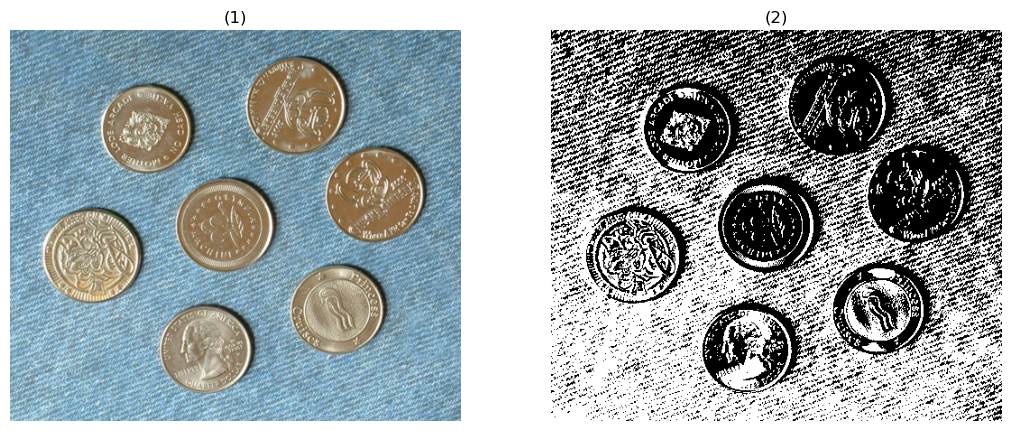

In [86]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
image = io.imread('./img/coins.jpg')
grayimage =cv.cvtColor(image,cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(grayimage,150,255,cv.THRESH_BINARY)
show_images([image, binary_image])

In [87]:
def Erosion(size, image):
    window= np.ones((size, size))
    output = np.zeros_like(image)
    width, height = image.shape
    image = np.pad(image, size//2, 'edge')
   
   
    for i in range(width):
        for j in range(height):
            output[i,j] =  np.min(image[i:i + size, j:j + size]* window)
    return output


In [88]:
def Dialation(size, image):
    window= np.ones((size, size))
    output = np.zeros_like(image)
    width, height = image.shape
    image = np.pad(image, size//2, 'edge')
   
   
    for i in range(width):
        for j in range(height):
            output[i,j] =  np.max(image[i:i + size, j:j + size]* window)
    return output

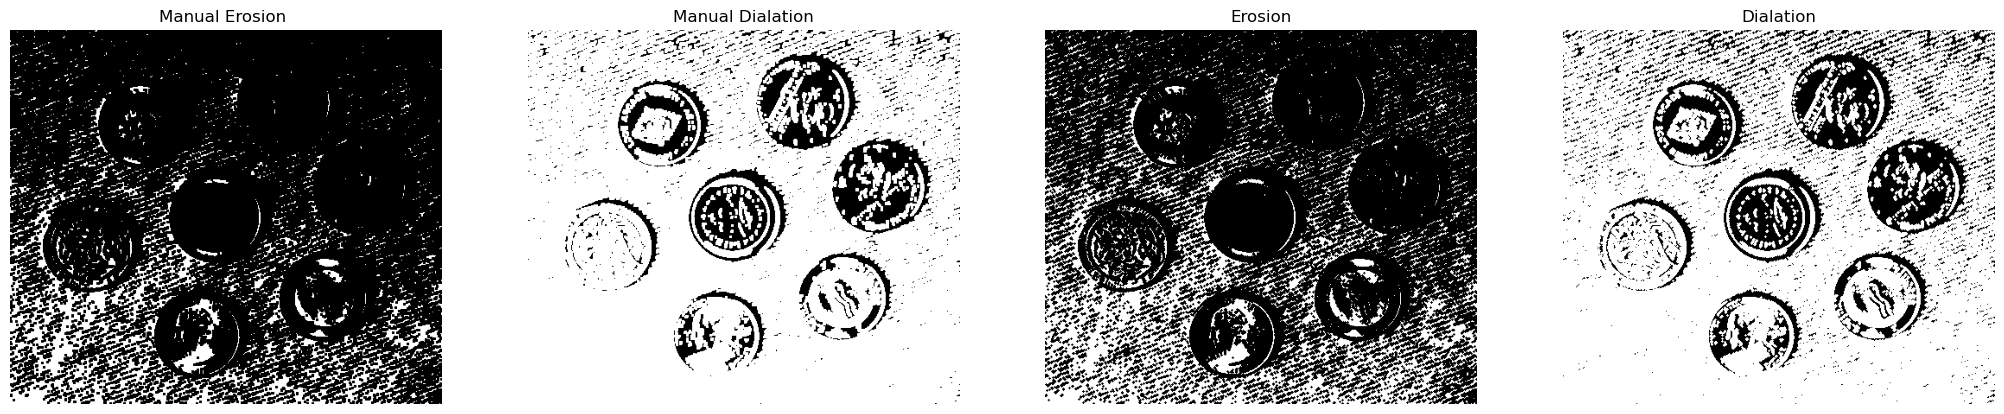

In [89]:

erosion =Erosion(3, binary_image)
dialation = Dialation(3, binary_image)
show_images([erosion, dialation, binary_erosion(binary_image), binary_dilation(binary_image)], ['Manual Erosion ', 'Manual Dialation', 'Erosion', 'Dialation'])

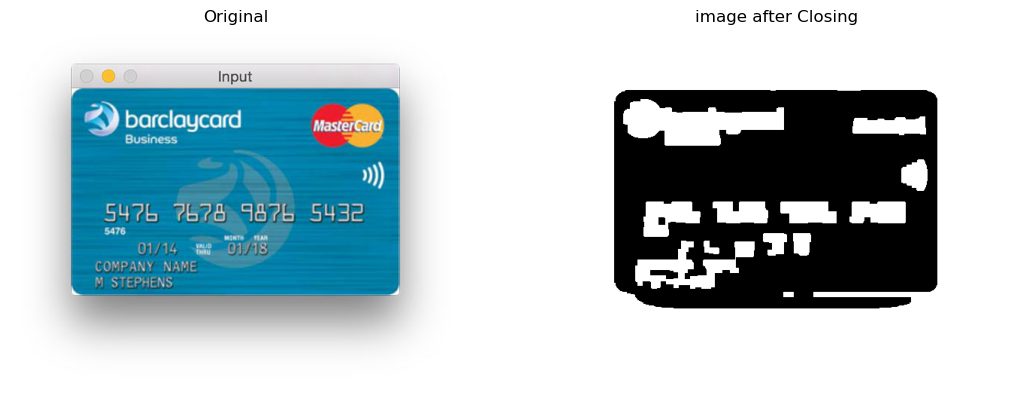

In [442]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
        closing : dialation then erosion 
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
card = io.imread('./img/card.jpg')
grey_card = cv.cvtColor(card,cv.COLOR_BGR2GRAY)
_, binary_card = cv.threshold(grey_card,165,255,cv.THRESH_BINARY)
trials = 3
closing_img = binary_card
for i in range(trials):
    closing_img = Erosion(7, Dialation(9,closing_img))
show_images([card, closing_img], ['Original','image after Closing'])

In [443]:

contours = find_contours(closing_img)
bounding_boxes = []

for contour in contours:
    min_y, min_x = np.min(contour, axis=0)
    max_y, max_x = np.max(contour, axis=0)

    
    aspect_ratio=  (max_x- min_x)/(max_y - min_y) 

    if aspect_ratio >= 2.5 and aspect_ratio <= 3.5:
        bounding_boxes.append((min_x, max_x, min_y, max_y))

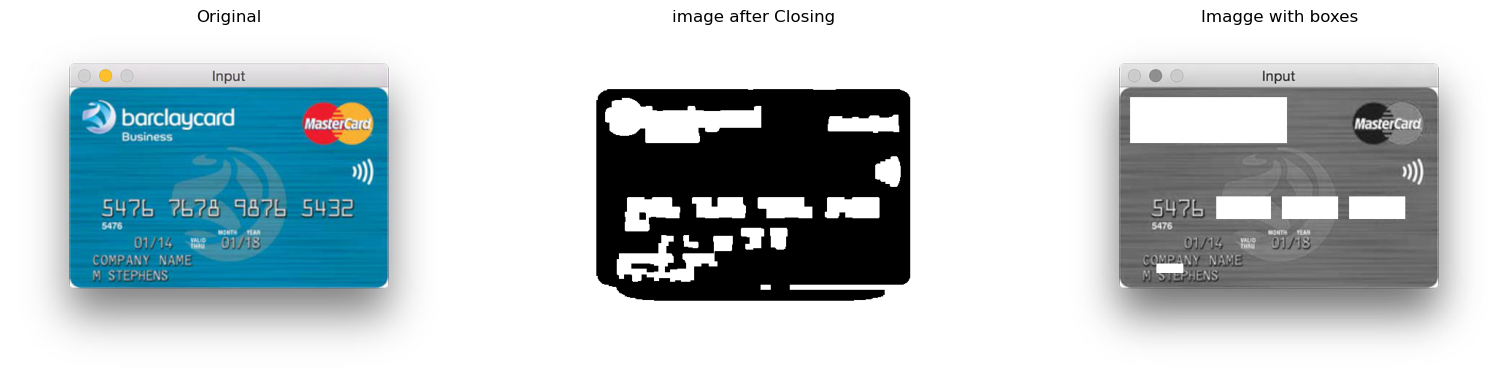

In [444]:

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
img_with_boxes = grey_card.copy()
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=grey_card.shape)
    img_with_boxes[rr, cc] = 255 #set color white
show_images([card, closing_img, img_with_boxes], ['Original','image after Closing', 'Imagge with boxes'])


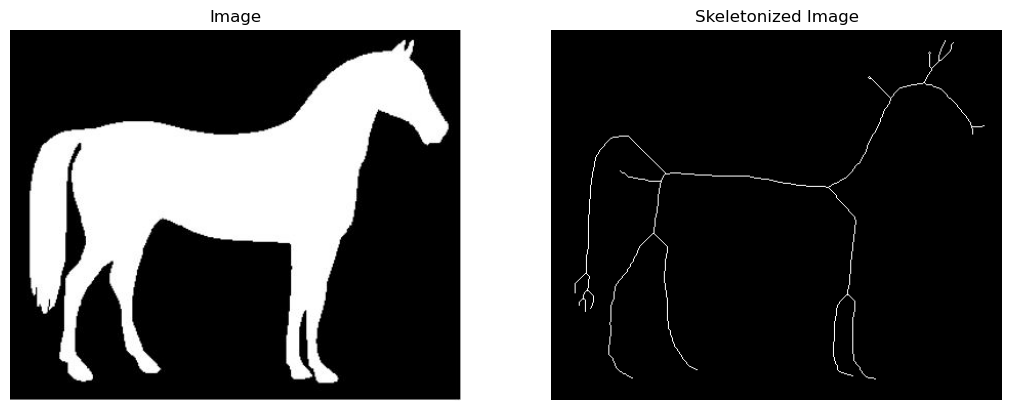

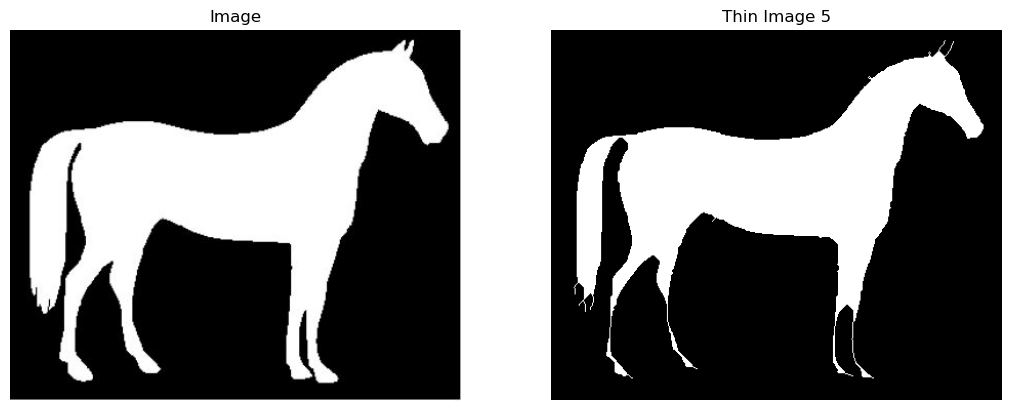

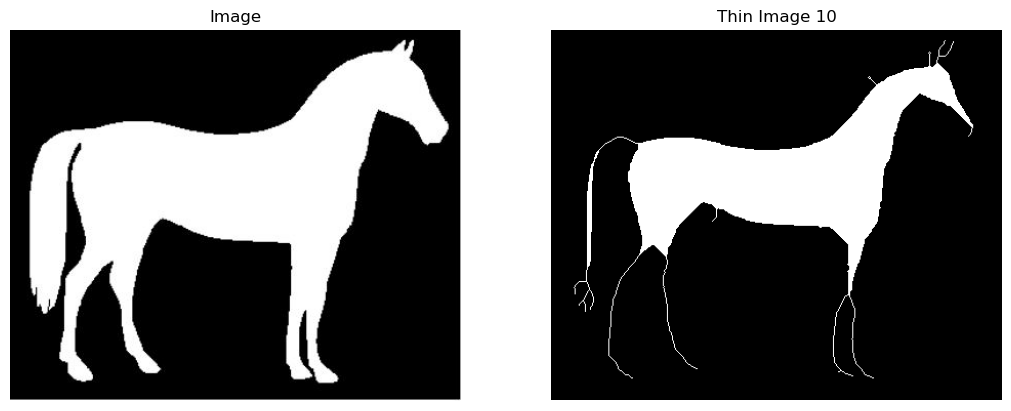

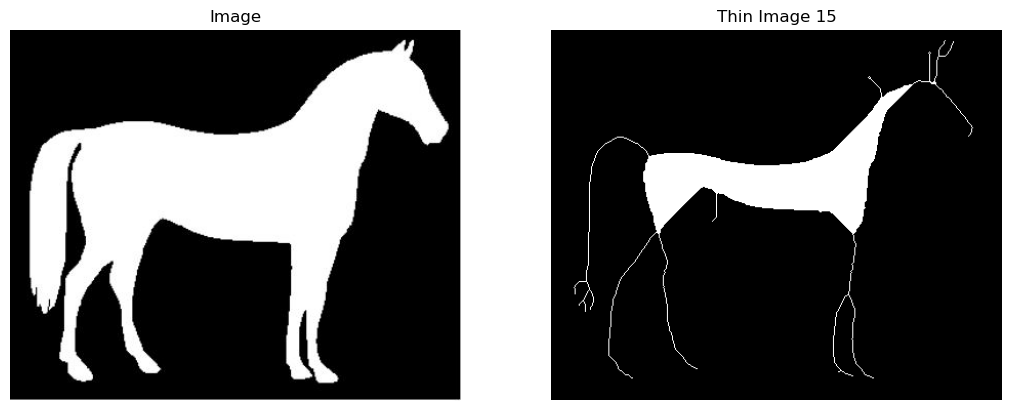

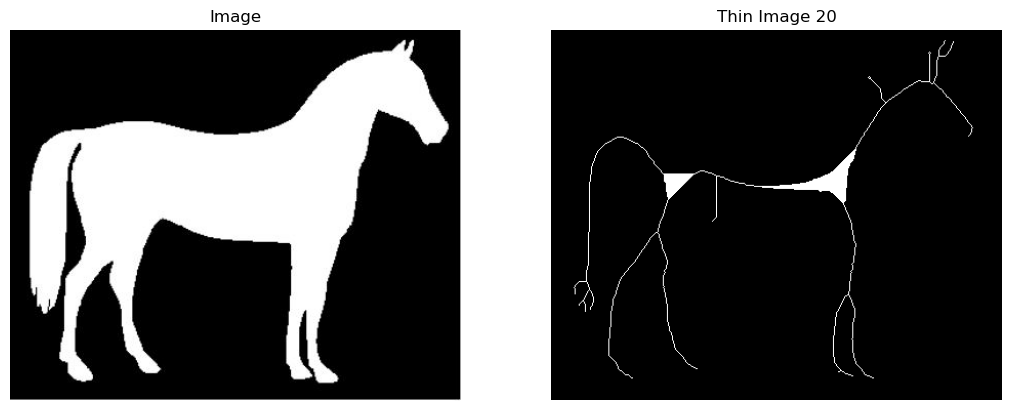

In [450]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it

'''

image = io.imread('img/horse.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
binary_image = gray_image / 255.0
binary_image = binary_image > 0.9 
skeleton = skeletonize(binary_image)

show_images([image, skeleton], ['Image','Skeletonized Image'])


iterations = [5, 10, 15, 20]

for i, max_iter in enumerate(iterations):
    thin_image = thin(binary_image, max_iter)
    show_images([image, thin_image], ['Image', f'Thin Image {max_iter}'])
